In [175]:
import math 
import pandas as pd
import dmba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary
from dmba import liftChart, gainsChart
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import numpy as np 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
import statsmodels.api as sm 
from mord import LogisticIT 
import seaborn as sns
from dmba.metric import AIC_score
import scikitplot as skplt

In [176]:
fundraising_df = pd.read_csv('Fundraising.csv')

In [177]:
pd.set_option('display.max_rows',None)
pd.set_option("max_rows", None)
fundraising_df.head(200)

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,17,0,1,0,0,1,1,5,1,9,1399,637,703,1,74,102.00,6.0,5.0,29,3,4.857143,1,5.00
1,2,25,1,0,0,0,1,1,1,0,7,698,422,463,4,46,94.00,12.0,12.0,34,6,9.400000,1,10.00
2,3,29,0,0,0,1,0,2,5,1,8,828,358,376,13,32,30.00,10.0,5.0,29,7,4.285714,1,5.00
3,4,38,0,0,0,1,1,1,3,0,4,1471,484,546,4,94,177.00,10.0,8.0,30,3,7.080000,0,0.00
4,5,40,0,1,0,0,1,1,4,0,8,547,386,432,7,20,23.00,11.0,11.0,30,6,7.666667,0,0.00
5,6,53,0,1,0,0,1,1,4,1,8,482,242,275,28,38,73.00,10.0,10.0,31,3,7.300000,1,8.00
6,7,58,0,0,0,1,1,1,4,1,8,857,450,498,5,47,139.00,20.0,20.0,37,3,10.692308,1,10.00
7,8,61,1,0,0,0,1,1,1,0,7,1355,411,497,9,77,249.00,15.0,7.0,35,3,9.576923,1,20.00
8,9,71,0,0,1,0,1,1,4,0,5,505,333,388,16,51,63.00,15.0,10.0,37,8,9.000000,1,5.00
9,10,87,1,0,0,0,1,1,4,1,8,1438,458,533,8,21,26.00,16.0,16.0,30,6,13.000000,0,0.00


In [178]:
# Drop column TARGET_D
fundraising_df = fundraising_df.drop(columns=['TARGET_D'])

In [179]:
fundraising_df.head(200)

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B
0,1,17,0,1,0,0,1,1,5,1,9,1399,637,703,1,74,102.00,6.0,5.0,29,3,4.857143,1
1,2,25,1,0,0,0,1,1,1,0,7,698,422,463,4,46,94.00,12.0,12.0,34,6,9.400000,1
2,3,29,0,0,0,1,0,2,5,1,8,828,358,376,13,32,30.00,10.0,5.0,29,7,4.285714,1
3,4,38,0,0,0,1,1,1,3,0,4,1471,484,546,4,94,177.00,10.0,8.0,30,3,7.080000,0
4,5,40,0,1,0,0,1,1,4,0,8,547,386,432,7,20,23.00,11.0,11.0,30,6,7.666667,0
5,6,53,0,1,0,0,1,1,4,1,8,482,242,275,28,38,73.00,10.0,10.0,31,3,7.300000,1
6,7,58,0,0,0,1,1,1,4,1,8,857,450,498,5,47,139.00,20.0,20.0,37,3,10.692308,1
7,8,61,1,0,0,0,1,1,1,0,7,1355,411,497,9,77,249.00,15.0,7.0,35,3,9.576923,1
8,9,71,0,0,1,0,1,1,4,0,5,505,333,388,16,51,63.00,15.0,10.0,37,8,9.000000,1
9,10,87,1,0,0,0,1,1,4,1,8,1438,458,533,8,21,26.00,16.0,16.0,30,6,13.000000,0


In [180]:
###############################################################
##              LOGISTIC REGRESSION MODEL                    ##
###############################################################

In [181]:
outcome = 'TARGET_B'
predictors = ['zipconvert_2','zipconvert_3','zipconvert_4','zipconvert_5','homeowner dummy','NUMCHLD','INCOME','gender dummy','WEALTH', 'HV','Icmed','Icavg','IC15','NUMPROM','RAMNTALL','MAXRAMNT','LASTGIFT','totalmonths','TIMELAG','AVGGIFT']

In [182]:
# partition data 
X = fundraising_df[predictors] 
y = fundraising_df[outcome]

In [183]:
# training and Validation Data
train_X1, valid_X1, train_y1, valid_y1 = train_test_split( X, y, test_size = 0.4, random_state = 1)

In [184]:
# fit a logistic regression (set penalty = l2 and C = 1e42 to avoid regularization) 
logit_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear') 
logit_reg.fit( train_X1, train_y1)

LogisticRegression(C=1e+42, solver='liblinear')

In [185]:
# settings to display all columns
pd.set_option("display.max_columns", None)
print('intercept',logit_reg.intercept_[0]) 
print( pd.DataFrame({'coeff': logit_reg.coef_[0]},index = X.columns).transpose())

intercept -0.2228491542620076
       zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
coeff      1.796269      1.795799      1.822041      1.740427   

       homeowner dummy   NUMCHLD    INCOME  gender dummy    WEALTH        HV  \
coeff         0.243757 -0.095755  0.058615      0.072197  0.015925  0.000089   

          Icmed     Icavg      IC15   NUMPROM  RAMNTALL  MAXRAMNT  LASTGIFT  \
coeff  0.001245 -0.001572  0.002532  0.001006 -0.000127  0.001521 -0.005935   

       totalmonths   TIMELAG  AVGGIFT  
coeff    -0.061871  0.015784 -0.01125  


In [186]:
print(' AIC', AIC_score( valid_y1,logit_reg.predict(valid_X1), df = len( train_X1.columns) + 1))

 AIC 2549.3958978912224


In [187]:
# training confusion matrix 
classificationSummary(train_y1, logit_reg.predict(train_X1))

Confusion Matrix (Accuracy 0.5566)

       Prediction
Actual   0   1
     0 502 433
     1 397 540


In [188]:
# validation confusion matrix 
classificationSummary(valid_y1, logit_reg.predict(valid_X1))

Confusion Matrix (Accuracy 0.5641)

       Prediction
Actual   0   1
     0 341 284
     1 260 363


<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

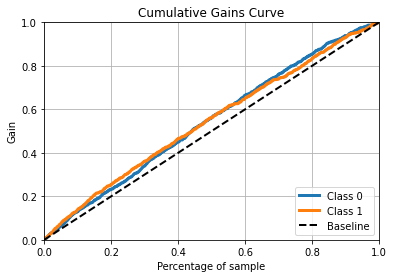

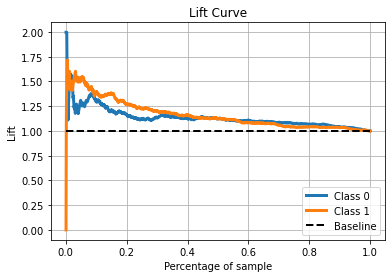

In [189]:
y_prob1 = logit_reg.predict_proba(valid_X1)
skplt.metrics.plot_cumulative_gain(valid_y1, y_prob1)
skplt.metrics.plot_lift_curve(valid_y1, y_prob1)

In [190]:
###############################################################
##                    NEURAL NETS MODEL                      ##
###############################################################

In [191]:
from sklearn.neural_network import MLPClassifier 

In [192]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [193]:
#Scale the numerical predictor 

In [194]:
fundraising_df[['NUMCHLD']] = MinMaxScaler().fit_transform(fundraising_df[['NUMCHLD']])

In [195]:
fundraising_df[['INCOME']] = MinMaxScaler().fit_transform(fundraising_df[['INCOME']])

In [196]:
fundraising_df[['WEALTH']] = MinMaxScaler().fit_transform(fundraising_df[['WEALTH']])

In [197]:
fundraising_df[['HV']] = MinMaxScaler().fit_transform(fundraising_df[['HV']])

In [198]:
fundraising_df[['Icmed']] = MinMaxScaler().fit_transform(fundraising_df[['Icmed']])

In [199]:
fundraising_df[['Icavg']] = MinMaxScaler().fit_transform(fundraising_df[['Icavg']])

In [200]:
fundraising_df[['IC15']] = MinMaxScaler().fit_transform(fundraising_df[['IC15']])

In [201]:
fundraising_df[['NUMPROM']] = MinMaxScaler().fit_transform(fundraising_df[['NUMPROM']])

In [202]:
fundraising_df[['RAMNTALL']] = MinMaxScaler().fit_transform(fundraising_df[['RAMNTALL']])

In [203]:
fundraising_df[['MAXRAMNT']] = MinMaxScaler().fit_transform(fundraising_df[['MAXRAMNT']])

In [204]:
fundraising_df[['LASTGIFT']] = MinMaxScaler().fit_transform(fundraising_df[['LASTGIFT']])

In [205]:
fundraising_df[['totalmonths']] = MinMaxScaler().fit_transform(fundraising_df[['totalmonths']])

In [206]:
fundraising_df[['TIMELAG']] = MinMaxScaler().fit_transform(fundraising_df[['TIMELAG']])

In [207]:
fundraising_df[['AVGGIFT']] = MinMaxScaler().fit_transform(fundraising_df[['AVGGIFT']])

In [208]:
fundraising_df.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B
0,1,17,0,1,0,0,1,0.00,0.666667,1,1.000000,0.235324,0.424667,0.528174,0.011111,0.431507,0.015371,0.001005,0.022831,0.60,0.038961,0.022647,1
1,2,25,1,0,0,0,1,0.00,0.000000,0,0.777778,0.117410,0.281333,0.347859,0.044444,0.239726,0.013958,0.007035,0.054795,0.85,0.077922,0.060495,1
2,3,29,0,0,0,1,0,0.25,0.666667,1,0.888889,0.139277,0.238667,0.282494,0.144444,0.143836,0.002650,0.005025,0.022831,0.60,0.090909,0.017886,1
3,4,38,0,0,0,1,1,0.00,0.333333,0,0.444444,0.247435,0.322667,0.410218,0.044444,0.568493,0.028622,0.005025,0.036530,0.65,0.038961,0.041166,0
4,5,40,0,1,0,0,1,0.00,0.500000,0,0.888889,0.092010,0.257333,0.324568,0.077778,0.061644,0.001413,0.006030,0.050228,0.65,0.077922,0.046054,0


In [209]:
outcome2 = 'TARGET_B'
predictors2 = ['zipconvert_2','zipconvert_3','zipconvert_4','zipconvert_5','homeowner dummy','NUMCHLD','INCOME','gender dummy','WEALTH', 'HV','Icmed','Icavg','IC15','NUMPROM','RAMNTALL','MAXRAMNT','LASTGIFT','totalmonths','TIMELAG','AVGGIFT']

In [210]:
# partition data 
X2 = fundraising_df[predictors2] 
y2 = fundraising_df[outcome2]

In [211]:
# training and Validation Data
train_X2, valid_X2, train_y2, valid_y2 = train_test_split( X2, y2, test_size = 0.4, random_state = 1)

In [212]:
# train neural network with 2 hidden nodes
clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
clf.fit( train_X2, train_y2.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=2, random_state=1,
              solver='lbfgs')

In [213]:
print(' AIC', AIC_score( valid_y2,clf.predict(valid_X2), df = len( train_X2.columns) + 1))

 AIC 2629.366311033506


In [214]:
# training confusion matrix 
classificationSummary(train_y2, clf.predict(train_X2))

Confusion Matrix (Accuracy 0.5625)

       Prediction
Actual   0   1
     0 463 472
     1 347 590


In [215]:
# validation confusion matrix 
classificationSummary(valid_y2, logit_reg.predict(valid_X2))

Confusion Matrix (Accuracy 0.5000)

       Prediction
Actual   0   1
     0   1 624
     1   0 623


<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

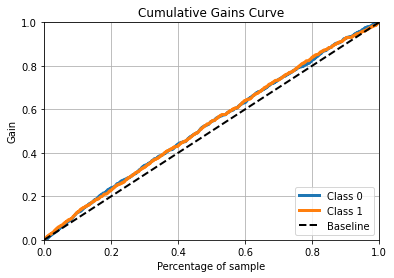

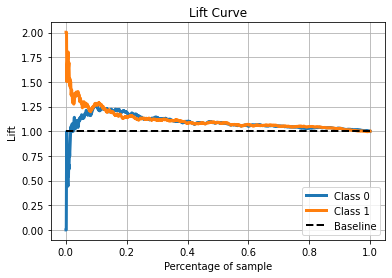

In [216]:
y_prob2 = clf.predict_proba(valid_X2)
skplt.metrics.plot_cumulative_gain(valid_y2, y_prob2)
skplt.metrics.plot_lift_curve(valid_y2, y_prob2)

In [217]:
###############################################################
##       TESTIN WITH LOGISTIC REGRESSION MODEL               ##
###############################################################

In [218]:
fundraising2_df = pd.read_csv('FutureFundraising.csv')

In [219]:
fundraising2_df.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT,TARGET_B,TARGET_D
0,1,3,0,1,0,0,1,1,1,1,8,923,470,452,3,42,92.0,29.0,15.0,17,8,15.333333,NaN,NaN
1,2,4,0,0,1,0,0,1,2,1,9,724,489,453,4,21,30.0,20.0,20.0,33,9,15.000000,NaN,NaN
2,3,5,0,0,0,1,0,1,1,0,4,1153,412,376,10,61,220.0,35.0,25.0,31,9,24.444444,NaN,NaN
3,4,1,0,0,0,0,1,1,4,0,1,551,263,283,21,32,41.0,19.0,19.0,31,13,13.666667,NaN,NaN
4,5,4,0,0,1,0,1,1,7,1,9,2214,793,850,1,47,46.0,10.0,10.0,28,8,5.750000,NaN,NaN


In [220]:
# Drop column TARGET_D
fundraising2_df = fundraising2_df.drop(columns=['TARGET_D','TARGET_B' ])

In [221]:
fundraising2_df.head()

,Row Id,Row Id.,zipconvert_2,zipconvert_3,zipconvert_4,zipconvert_5,homeowner dummy,NUMCHLD,INCOME,gender dummy,WEALTH,HV,Icmed,Icavg,IC15,NUMPROM,RAMNTALL,MAXRAMNT,LASTGIFT,totalmonths,TIMELAG,AVGGIFT
0,1,3,0,1,0,0,1,1,1,1,8,923,470,452,3,42,92.0,29.0,15.0,17,8,15.333333
1,2,4,0,0,1,0,0,1,2,1,9,724,489,453,4,21,30.0,20.0,20.0,33,9,15.000000
2,3,5,0,0,0,1,0,1,1,0,4,1153,412,376,10,61,220.0,35.0,25.0,31,9,24.444444
3,4,1,0,0,0,0,1,1,4,0,1,551,263,283,21,32,41.0,19.0,19.0,31,13,13.666667
4,5,4,0,0,1,0,1,1,7,1,9,2214,793,850,1,47,46.0,10.0,10.0,28,8,5.750000


In [222]:
X_test = fundraising2_df[predictors] 

In [223]:
y_pred = clf.predict(X_test)

In [224]:
# list all probabilities of being not a donor ( 0- 1st column) and being a donor ( 1- 2nd column)
y_test=clf.predict_proba(X_test)
print("predict_proba array shape: ", y_test.shape)
print(y_test[0:2000])

predict_proba array shape:  (2000, 2)
[[0.13253063 0.86746937]
 [0.13253063 0.86746937]
 [0.13253063 0.86746937]
 ...
 [0.50421213 0.49578787]
 [0.13253063 0.86746937]
 [0.13253063 0.86746937]]


In [225]:
# list all probabilities of being  being a donor ( 1- 2nd column)
prob1=clf.predict_proba(X_test)[:,1]

In [230]:
# list array index of being  a donor in descending order 
import sys
np.set_printoptions(threshold=sys.maxsize)
np.argsort(prob1)[::-1][:2000]

array([1999,  692,  694,  695,  696,  697,  698,  699,  700,  701,  702,
        704,  705,  706,  707,  708,  709,  712,  713,  714,  715,  716,
        720,  721,  722,  724,  725,  693,  691,  727,  689,  663,  664,
        665,  666,  667,  668,  669,  670,  671,  672,  674,  675,  676,
        677,  678,  679,  680,  681,  682,  683,  684,  685,  686,  687,
        688,  726,  728,  661,  764,  768,  769,  770,  771,  772,  773,
        775,  776,  777,  778,  779,  780,  781,  782,  783,  784,  785,
        786,  787,  788,  789,  791,  792,  793,  794,  767,  763,  730,
        762,  731,  733,  734,  735,  737,  738,  739,  740,  741,  743,
        744,  745,  746,  748,  749,  750,  752,  753,  754,  755,  756,
        757,  758,  759,  761,  662,  660,  796,  566,  568,  569,  570,
        571,  572,  573,  575,  576,  577,  578,  579,  580,  581,  582,
        583,  584,  585,  586,  587,  588,  589,  590,  592,  593,  594,
        567,  565,  596,  564,  535,  537,  538,  5